# Assignment 3 Rong Xu(Cherie)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

/var/folders/lz/kx0jb1cs78z2m2gstxkqjmvr0000gn/T/ipykernel_22333/274997955.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)
# Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [3]:
# prep data that had scaled data
X = df
X_s = pd.DataFrame(scale(X), index=X.index, columns=X.columns)

Text(0.5, 1.0, 'Elbow curve')

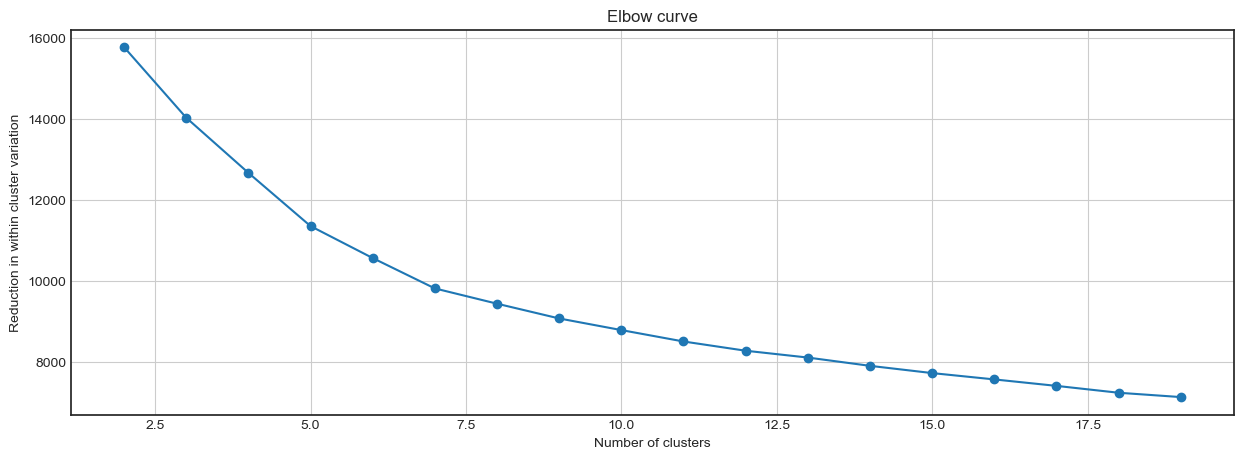

In [4]:
# evaluating best k with elbow chart
within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(X_s)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')

### looking at the elbow chart curve, we can clearly see that when at the 5 clusters level, the variations have a flat tendency, so I can concluded that there is 5 cluster in this dataset. 

In [5]:
# when k = 5
km1 = KMeans(n_clusters=5, n_init=20)
km1.fit(X_s)

KMeans(n_clusters=5, n_init=20)

In [6]:
pd.Series(km1.labels_).value_counts()

4    553
2    358
3    331
1    327
0     30
dtype: int64

In [7]:
km1.cluster_centers_

array([[ 0.06532185,  0.0103135 ,  1.10416018, -0.4082848 ,  5.52313653,
        -0.08685714,  0.50070009,  0.18055137, -1.67454694,  3.62449166,
        -0.88828122, -0.37493231],
       [-0.07787152,  0.08657659,  0.09863333,  0.43655804,  0.027587  ,
         1.09080506,  1.38151861,  0.38575257, -0.15324414, -0.18722975,
        -0.61683168, -0.46205596],
       [ 1.36726989, -0.67497657,  1.14004813,  0.1982924 , -0.01490265,
        -0.53858341, -0.52344787,  0.83323017, -0.84119353,  0.3303861 ,
         0.17210406,  0.40240871],
       [-0.59969859, -0.48503764, -0.10817614, -0.22183429, -0.3807964 ,
         0.18401003, -0.20163987, -1.13900232,  0.52855117,  0.2002653 ,
         1.21505413,  0.83255362],
       [-0.48368545,  0.67553186, -0.79151688, -0.23158674, -0.0783658 ,
        -0.40177577, -0.38452162, -0.09555925,  0.40966381, -0.41966846,
        -0.42575728, -0.4652754 ]])

In [8]:
km1.labels_

array([4, 4, 4, ..., 3, 4, 3], dtype=int32)

In [9]:
km1.inertia_

11357.130590159468

In [10]:
X['cluster'] = km1.labels_
display(X.groupby('cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,8.433333,0.529667,0.486000,1.963333,0.347333,14.966667,62.933333,0.997087,3.052667,1.272333,9.476667,5.333333
1,8.184098,0.543318,0.290183,3.154128,0.088765,27.281346,91.899083,0.997474,3.287462,0.626422,9.765851,5.262997
2,10.699441,0.406997,0.492989,2.818296,0.086765,10.243017,29.254190,0.998319,3.181285,0.714134,10.606331,5.960894
3,7.275831,0.440997,0.249909,2.226133,0.069550,17.799094,39.836858,0.994598,3.392689,0.692085,11.717422,6.308157
4,7.477758,0.648743,0.116835,2.212387,0.083779,11.673599,33.822785,0.996566,3.374340,0.587034,9.969409,5.260398


## from 5 clusters, it show a more clear trends of what variables impact to have higher value or lower value of wine quality. To be specifically, by looking at quality cluster mean, the lower number better.  in cluster 2 it has the higher value of wine quality and in cluster 1 it has the lower value of wine quality. For cluster 1, comparing with other clusters, citric acid, density alcohol, and fixed acidity are at the moderately higher level; residual sugar, sulphates, and volatile acidity are at moderate level; chlorides, free sulfur dioxide, total sulfur dioxide, and ph are at the lower level. For cluster 2, fixed acidity, ph and alcohol are at the low level; rest of variables are at the higher level. Overall, to make a good bottle of wine according to this analysis, aming for a balance in acidity (not too high or low), moderate citric acid content, lower chlorides, and sulfur dioxide levels, and a slightly higher alcohol content.

# 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.
# Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.
# If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [11]:
best_k = 5
km2 = KMeans(n_clusters=best_k, n_init=20)
#for scaled data
X_s['Cluster'] = km2.fit_predict(X_s)

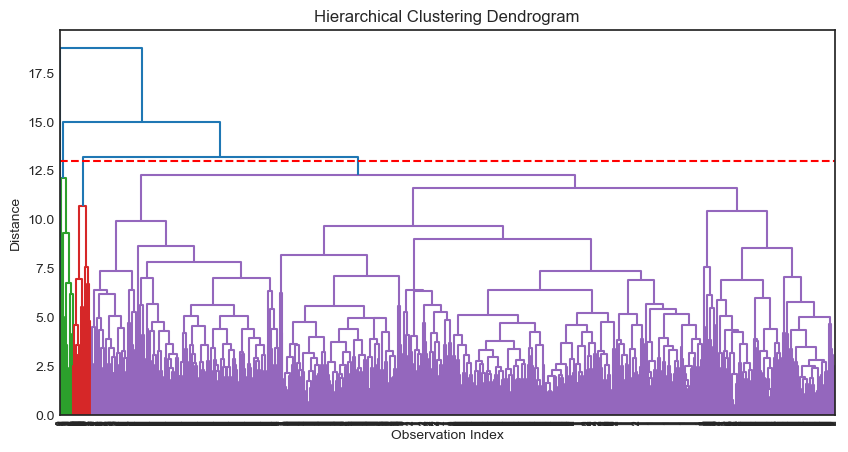

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X_s.values, method='complete', metric='euclidean')

#plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=X_s['Cluster'].values, leaf_rotation=90, leaf_font_size=6)


# Draw a horizontal line at the threshold distance 
threshold_distance = 13
plt.axhline(y=threshold_distance, color='r', linestyle='--', label=f'Threshold Distance: {threshold_distance}')


plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

## looking at the diagram in the above, i can visually see three clusters by using dendrogram if we set the distance = 13. 

In [14]:
from scipy.cluster.hierarchy import fcluster, linkage

threshold_distance = 13
X_s['Hierarchical_Cluster'] = fcluster(linkage_matrix, threshold_distance, criterion='distance')

# Print the mean for each cluster
cluster_means = X.groupby('cluster')['quality'].mean()

higher_quality_cluster = cluster_means.idxmax()
lower_quality_cluster = cluster_means.idxmin()

higher_quality_variables = X[X['cluster'] == higher_quality_cluster].mean()
lower_quality_variables = X[X['cluster'] == lower_quality_cluster].mean()

print(f"Variables for Cluster with Higher Mean Wine Quality (Cluster {higher_quality_cluster}):")
print(higher_quality_variables)

print("\n")

print(f"Variables for Cluster with Lower Mean Wine Quality (Cluster {lower_quality_cluster}):")
print(lower_quality_variables)


Variables for Cluster with Higher Mean Wine Quality (Cluster 3):
fixed acidity            7.275831
volatile acidity         0.440997
citric acid              0.249909
residual sugar           2.226133
chlorides                0.069550
free sulfur dioxide     17.799094
total sulfur dioxide    39.836858
density                  0.994598
pH                       3.392689
sulphates                0.692085
alcohol                 11.717422
quality                  6.308157
cluster                  3.000000
dtype: float64


Variables for Cluster with Lower Mean Wine Quality (Cluster 4):
fixed acidity            7.477758
volatile acidity         0.648743
citric acid              0.116835
residual sugar           2.212387
chlorides                0.083779
free sulfur dioxide     11.673599
total sulfur dioxide    33.822785
density                  0.996566
pH                       3.374340
sulphates                0.587034
alcohol                  9.969409
quality                  5.260398
clus

In [15]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cluster'],
      dtype='object')


In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,4
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## compared with cluster 1 and cluster 0, for higher wine quality, fixed acidity, volatile acidity, residual sugar, chlorides and density are at low level; citric acid, free sulfur dioxide, total sulfur dioxide, pH, sulphates, alcohol are at high level, vice versa for low-quality wines. Overall, in order to produce a wine with higher quality based on this analysis, we could aim for lower volatile acidity, citric acid, and chlorides. Higher levels of free and total sulfur dioxide could be considered. A slightly higher pH and sulphate content. A higher alcohol content may also contribute to higher quality. Compared with previous conclusion (looking at below two diagrams, we can see that free and total sulfur dioxide at low level is good for wine quality.

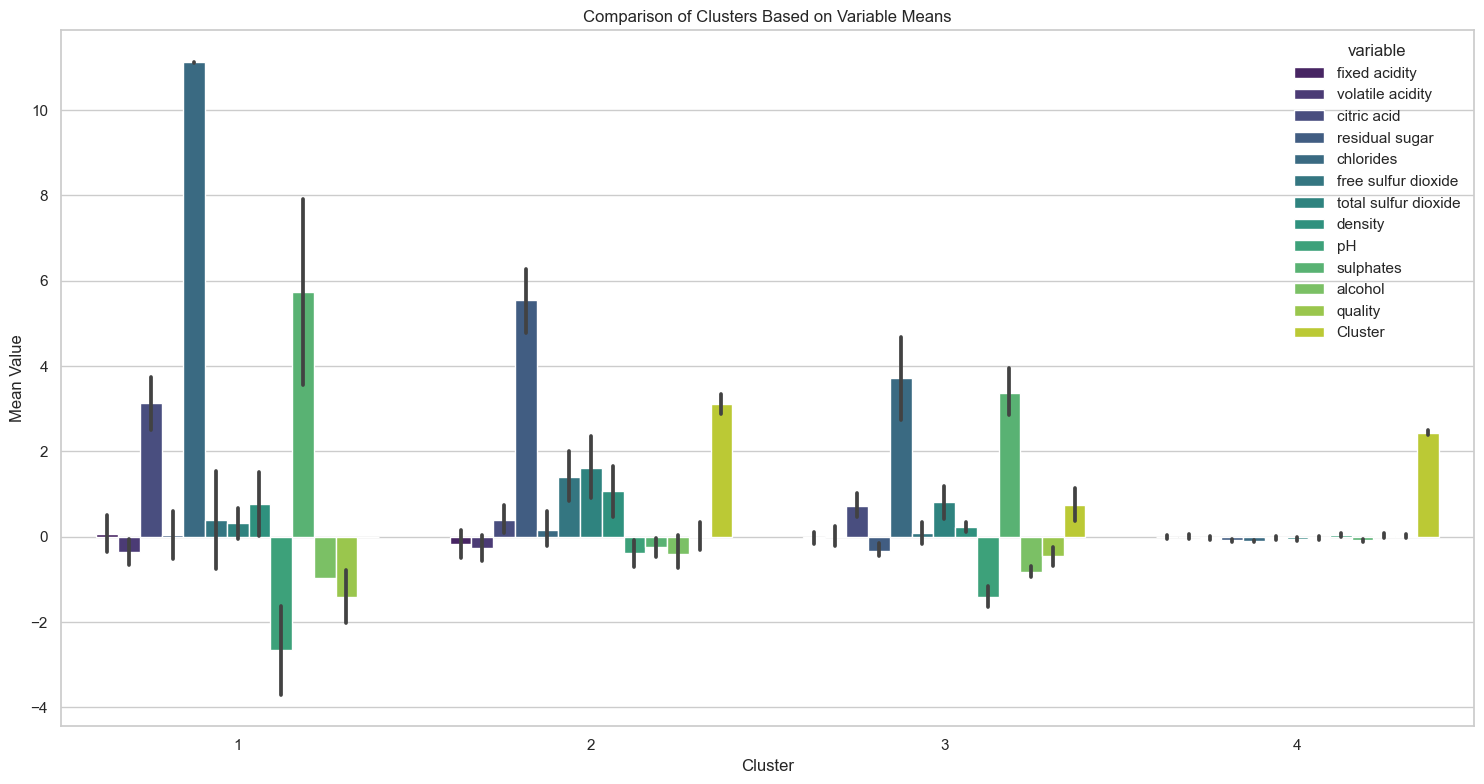

In [20]:
import seaborn as sns

# K-means clustering
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Hierarchical_Cluster', y='value', hue='variable', data=pd.melt(X_s, id_vars='Hierarchical_Cluster'), ax=ax, palette="viridis")
plt.title('Comparison of Clusters Based on Variable Means')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()


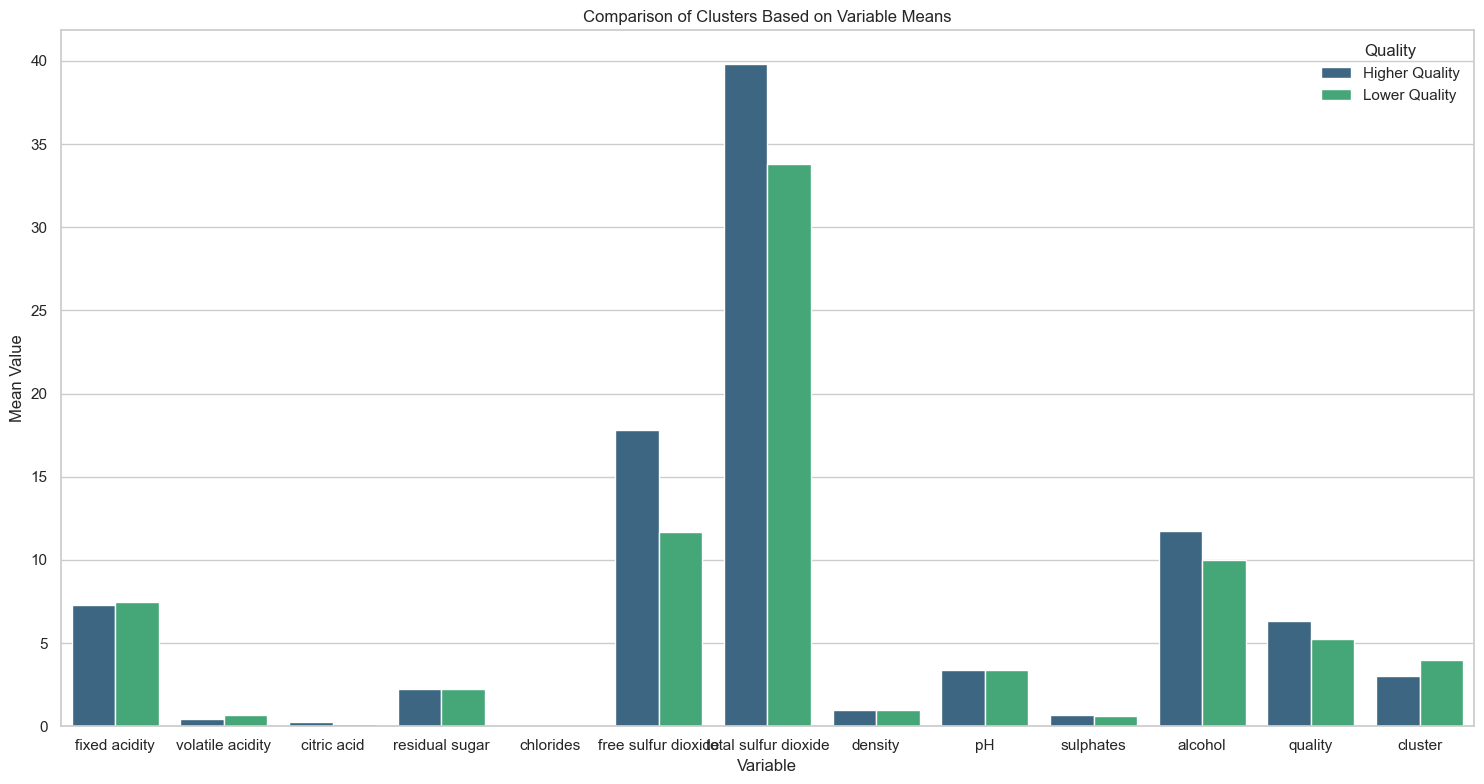

In [21]:
# Hierarchical clustering
sns.set(style="whitegrid")

combined_variables = pd.concat([higher_quality_variables, lower_quality_variables], axis=1)
combined_variables.columns = ['Higher Quality', 'Lower Quality']

melted_data = pd.melt(combined_variables.reset_index(), id_vars='index', var_name='Quality', value_name='Mean Value')

fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='index', y='Mean Value', hue='Quality', data=melted_data, ax=ax, palette="viridis")
plt.title('Comparison of Clusters Based on Variable Means')
plt.xlabel('Variable')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()


# 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [22]:
pca = PCA(n_components=2) 
projected = pca.fit_transform(X_s) # scaled data
print("original shape:   ", X_s.shape)
print("transformed shape:", projected.shape)

original shape:    (1599, 14)
transformed shape: (1599, 2)


In [23]:
print(projected[:5, :])  # PCA-transformed data

[[-1.5699087   1.45953473]
 [-0.91611301  2.09981393]
 [-0.85950946  1.46479649]
 [ 2.91173892 -0.37219058]
 [-1.5699087   1.45953473]]


In [24]:
explained_variance_ratio = pca.explained_variance_ratio_
print("explained variance ratio:", explained_variance_ratio)

explained variance ratio: [0.2751049  0.17219321]


## as we reduced the dimensions and the transformed data has been reduced to two principal components. In two principal components, the first principal component explains around 27.1% of the total variance in your data, the second principal component explains around 20.2% of the total variance in your data.

In [25]:
pca.explained_variance_ 

array([3.66457296, 2.29372348])

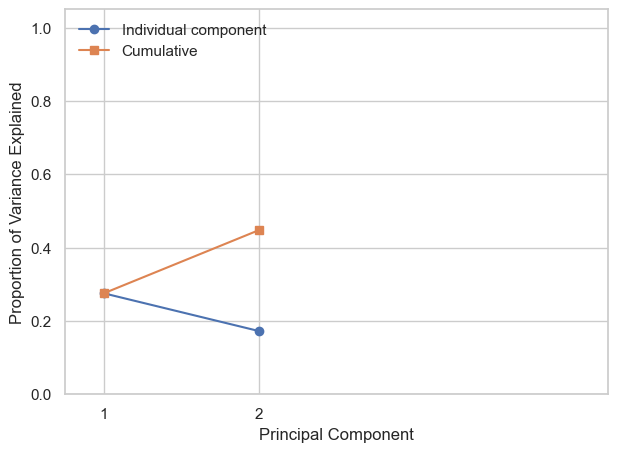

In [26]:
plt.figure(figsize=(7,5))

plt.plot([1,2], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2])
plt.legend(loc=2);

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('quality', axis=1)  # set 'quality' is the target variable
y = df['quality']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6036176843864786


## In this case, the model is predicting the 'quality' of wine using a linear regression model with supervised learning. MSE=0.57 suggests how well the model is performing on the test set, while lower MSE values indicate better performance. 